In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [2]:
education = pd.read_csv('Education.csv', encoding='ISO-8859-1', header=0)
education = education.iloc[:, :-1]
education = education.dropna().reset_index(drop=True)

1) Plot a histogram of the percentage of adults with a bachelor's degree or higher in 2000.

(array([ 645., 1351.,  605.,  277.,  124.,   60.,   38.,   16.,    6.,
           3.]),
 array([ 4.9 , 10.78, 16.66, 22.54, 28.42, 34.3 , 40.18, 46.06, 51.94,
        57.82, 63.7 ]),
 <a list of 10 Patch objects>)

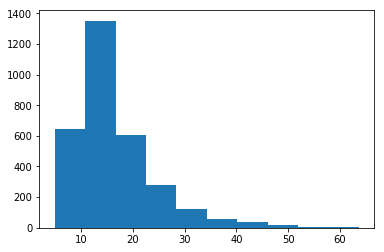

In [3]:
plt.hist(education["Percent of adults with a bachelor's degree or higher, 2000"])

2) Plot a boxplot of the percentage of adults with a bachelor's degree or higher in 2000. Are there any outliers? If so, how many? What is the cutoff for an outlier on either side?

{'boxes': [<matplotlib.lines.Line2D at 0x10c29ca90>],
 'caps': [<matplotlib.lines.Line2D at 0x10c29bf60>,
 'fliers': [<matplotlib.lines.Line2D at 0x10c26ccc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10c275ef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10c29c898>,
  <matplotlib.lines.Line2D at 0x10c29c400>]}

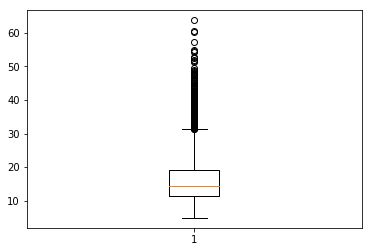

In [4]:
plt.boxplot(education["Percent of adults with a bachelor's degree or higher, 2000"])
#plt.ylim(bottom=0)

In [5]:
np.percentile(education["Percent of adults with a bachelor's degree or higher, 2000"], 75) + (1.5 * (np.percentile(education["Percent of adults with a bachelor's degree or higher, 2000"], 75) - np.percentile(education["Percent of adults with a bachelor's degree or higher, 2000"], 25)))

31.3

In [6]:
np.percentile(education["Percent of adults with a bachelor's degree or higher, 2000"], 25) - (1.5 * (np.percentile(education["Percent of adults with a bachelor's degree or higher, 2000"], 75) - np.percentile(education["Percent of adults with a bachelor's degree or higher, 2000"], 25)))

-0.6999999999999993

In [7]:
education[education["Percent of adults with a bachelor's degree or higher, 2000"] > 31.3].shape

(174, 47)

In [8]:
education[education["Percent of adults with a bachelor's degree or higher, 2000"] < 0].shape

(0, 47)

3) Which state has the highest average percentage of adults with a bachelor's degree? Which state has the lowest? (We want to take the average of the percentage of bachelor's degrees in each county per state) / (Save this to a new variable, as we'll be using it a lot)

In [9]:
state_mean = education.groupby('State')["Percent of adults with a bachelor's degree or higher, 2000"].mean()

In [10]:
np.max(state_mean)

39.1

In [11]:
state_mean[state_mean == state_mean.max()]

State
DC    39.1
Name: Percent of adults with a bachelor's degree or higher, 2000, dtype: float64

In [12]:
plt

<module 'matplotlib.pyplot' from '/Users/evan.agovino/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [13]:
state_mean[state_mean == state_mean.min()]

State
KY    11.554167
Name: Percent of adults with a bachelor's degree or higher, 2000, dtype: float64

4) Plot a histogram for the percentage of adults with a bachelor degree by state.

(array([ 9., 16.,  8.,  8.,  2.,  4.,  1.,  2.,  0.,  1.]),
 array([11.55416667, 14.30875   , 17.06333333, 19.81791667, 22.5725    ,
        25.32708333, 28.08166667, 30.83625   , 33.59083333, 36.34541667,
        39.1       ]),
 <a list of 10 Patch objects>)

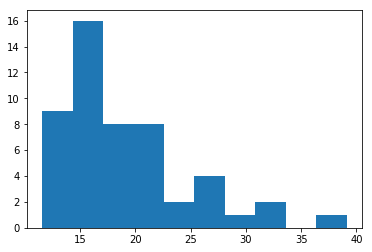

In [14]:
plt.hist(education.groupby('State')["Percent of adults with a bachelor's degree or higher, 2000"].mean())

5) Plot a boxplot for the percentage of adults with a bachelor degree by state. Are there any outliers? If so, how many? What is the cutoff for an outlier on either side?

{'boxes': [<matplotlib.lines.Line2D at 0x129d34278>],
 'caps': [<matplotlib.lines.Line2D at 0x129d34d68>,
 'fliers': [<matplotlib.lines.Line2D at 0x129d3dac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x129d3d668>],
 'whiskers': [<matplotlib.lines.Line2D at 0x129d343c8>,
  <matplotlib.lines.Line2D at 0x129d34908>]}

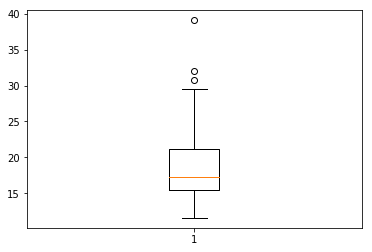

In [15]:
plt.boxplot(education.groupby('State')["Percent of adults with a bachelor's degree or higher, 2000"].mean())

In [16]:
np.percentile(state_mean, 75) + (1.5 * (np.percentile(state_mean, 75) - np.percentile(state_mean, 25)))

29.785506153105203

In [17]:
state_mean[state_mean > 29.785506153105203]

State
DC    39.100000
MA    32.057143
RI    30.840000
Name: Percent of adults with a bachelor's degree or higher, 2000, dtype: float64

In [18]:
np.percentile(state_mean, 25) - (1.5 * (np.percentile(state_mean, 75) - np.percentile(state_mean, 25)))

6.752526965668318

In [19]:
state_mean[state_mean < 6.752526965668318]

Series([], Name: Percent of adults with a bachelor's degree or higher, 2000, dtype: float64)

6) Now, let's read in a dataset that tells us whether a particular state voted for Al Gore or George Bush in 2000.

In [20]:
state_results = pd.read_html('https://transition.fec.gov/pubrec/2000presgeresults.htm', header=0)[2]
blue_states = state_results[state_results['ELECTORAL VOTE  BUSH'].isnull()]['STATE']
red_states = state_results[state_results['ELECTORAL VOTE  GORE'].isnull()]['STATE']

7) Create two arrays of the percentage of adults with bachelor degrees for red states and blue states - HINT: you can use the function index.isin(blue_states) and index.isin(red_states) to specifically query blue and red states.

Plot a boxplot showing blue states and red states (hint: you can plot two separate items in a boxplot by plotting an array, i.e. plt.boxplot([a, b])

Do blue states or red states have a higher mean % of bachelor degrees? What are the means of each? What is the mean difference between the two?

Do either groups of states have outliers? Which states are outliers?



In [21]:
blue_state_means = state_mean[state_mean.index.isin(blue_states)]
red_state_means = state_mean[state_mean.index.isin(red_states)]

{'boxes': [<matplotlib.lines.Line2D at 0x12a737588>,
 'caps': [<matplotlib.lines.Line2D at 0x12a737d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x12a76a9e8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12a76a588>,
 'whiskers': [<matplotlib.lines.Line2D at 0x12a7377b8>,
  <matplotlib.lines.Line2D at 0x12a776748>]}

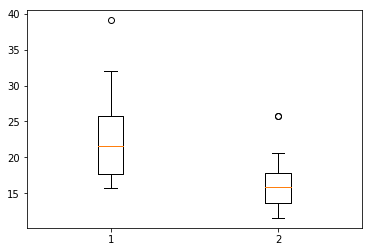

In [22]:
plt.boxplot([blue_state_means, red_state_means])

In [23]:
np.mean(blue_state_means)

22.702300477552225

In [24]:
np.mean(red_state_means)

16.415942191791217

In [25]:
np.mean(blue_state_means) - np.mean(red_state_means)

6.286358285761008

In [26]:
np.percentile(blue_state_means, 75) + (1.5 * (np.percentile(blue_state_means, 75) - np.percentile(blue_state_means, 25)))

37.784113300492585

In [27]:
blue_state_means[blue_state_means > 37.784113300492585]

State
DC    39.1
Name: Percent of adults with a bachelor's degree or higher, 2000, dtype: float64

In [28]:
np.percentile(blue_state_means, 25) - (1.5 * (np.percentile(blue_state_means, 75) - np.percentile(blue_state_means, 25)))

5.655049261083782

In [29]:
blue_state_means[blue_state_means < 5.655049261083782]

Series([], Name: Percent of adults with a bachelor's degree or higher, 2000, dtype: float64)

In [30]:
np.percentile(red_state_means, 75) + (1.5 * (np.percentile(red_state_means, 75) - np.percentile(red_state_means, 25)))

24.132666625827028

In [31]:
red_state_means[red_state_means > 24.132666625827028]

State
CO    25.726984
NH    25.800000
Name: Percent of adults with a bachelor's degree or higher, 2000, dtype: float64

In [32]:
np.percentile(red_state_means, 25) - (1.5 * (np.percentile(red_state_means, 75) - np.percentile(red_state_means, 25)))

7.37360757167359

In [33]:
red_state_means[red_state_means < 7.37360757167359]

Series([], Name: Percent of adults with a bachelor's degree or higher, 2000, dtype: float64)

8) Now run a boostrapping example using 10,000 simulations. Use np.random.seed(42) to ensure consistency if you run again. Concatenate the blue states and red states, shuffle them, and then break out new blue states and red states, similar to what we did last week in class. Record the difference between the blue states and red states.

Plot a histogram of the 10,000 differences recorded. What is the average difference?

In [34]:
np.random.seed(42)
diff = []
for i in range(10000):
    total = np.concatenate((blue_state_means, red_state_means), axis=None)
    np.random.shuffle(total)
    new_blue = total[:len(blue_state_means)]
    new_red = total[len(blue_state_means):]
    diff.append(np.mean(new_blue) - np.mean(new_red))

(array([  2.,   4.,   7.,   8.,  15.,  25.,  39.,  43.,  62.,  89., 116.,
        143., 171., 211., 294., 312., 385., 415., 480., 500., 533., 530.,
        569., 547., 530., 484., 506., 448., 447., 378., 318., 284., 237.,
        193., 171., 142., 100.,  81.,  61.,  41.,  34.,  15.,  10.,   7.,
          5.,   2.,   4.,   0.,   0.,   2.]),
 array([-5.30369105, -5.07508477, -4.8464785 , -4.61787222, -4.38926594,
        -4.16065966, -3.93205338, -3.70344711, -3.47484083, -3.24623455,
        -3.01762827, -2.78902199, -2.56041572, -2.33180944, -2.10320316,
        -1.87459688, -1.6459906 , -1.41738433, -1.18877805, -0.96017177,
        -0.73156549, -0.50295921, -0.27435294, -0.04574666,  0.18285962,
         0.4114659 ,  0.64007218,  0.86867845,  1.09728473,  1.32589101,
         1.55449729,  1.78310357,  2.01170984,  2.24031612,  2.4689224 ,
         2.69752868,  2.92613496,  3.15474123,  3.38334751,  3.61195379,
         3.84056007,  4.06916635,  4.29777262,  4.5263789 ,  4.75498518,
 

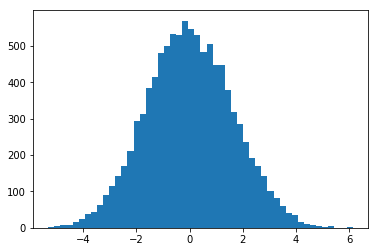

In [35]:
plt.hist(diff, bins=50)

In [36]:
np.mean(diff)

0.0005281125236016833

9) Say you are running a two-tailed hypothesis test, where the null hypothesis is that there is no difference in the percentage of bachelor's degrees for red and blue states, while the alternate hypothesis is that there is a difference.

If the test is at the 0.05 significance level, what are the rejection regions?

Where do the results you found earlier fit into the distribution? What is the percentile value? What is the p-value (remember, two-tailed)?

Can we reject the null hypothesis?

In [37]:
np.percentile(diff, 2.5)

-3.142081733806884

In [38]:
np.percentile(diff, 97.5)

3.194684134803748

In [39]:
stats.percentileofscore(diff, 6.286358285761008)

100.0

In [40]:
(1 - ((stats.percentileofscore(diff, 6.286358285761008))/100)) * 2

0.0